In [230]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

In [231]:
# load data from a excel file
df = pd.read_excel('result clean data.xlsx')

PartA: 
i. Between the two main Vendor Machines (Healthy Crocodile vs Self-Assured Grey
Seal). If there are other vendor machines, just ignore them. You can then dive
further down these two main groups by then looking at the different Linac Models
(Column I) to see if there are any correlations or interesting things?

In [232]:
group_Manu_Model_mean = df.groupby(['Manuf', 'Model'])['predictedValue'].mean().reset_index()
group_Manu_Model_mean

,Manuf,Model,predictedValue
0,Healthy Crocodile,Familiar Pug,58.395815
1,Healthy Crocodile,Important Maltese,412.844322
2,Healthy Crocodile,Next Stellers Sea Cow,78.948025
3,Healthy Crocodile,Old Bottle Nosed Dolphin,69.146648
4,Healthy Crocodile,Second Edible Frog,78.502208
5,Healthy Crocodile,Stormy Galapagos Tortoise,177.701891
6,Healthy Crocodile,Usable Gorilla,54.394618
7,Self-assured Grey Seal,All Vampire Bat,0.006045
8,Self-assured Grey Seal,Great Indri,34.402767
9,Self-assured Grey Seal,Honored Frog,66.337388


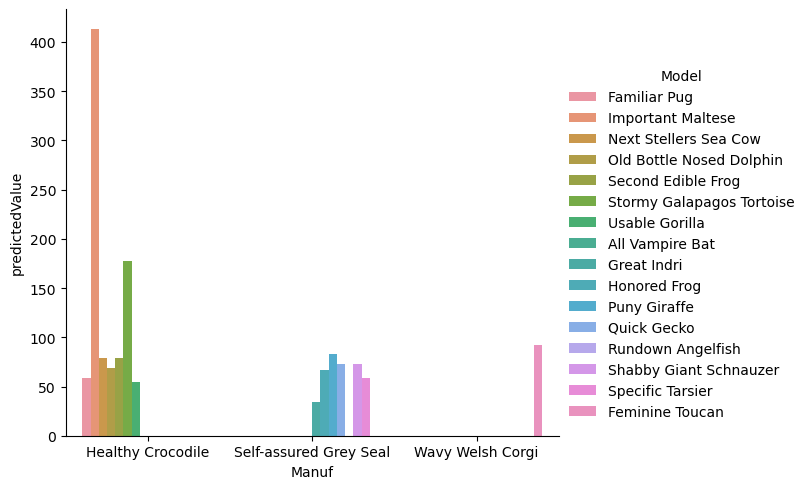

In [257]:
sns.catplot(x='Manuf', y='predictedValue', hue='Model', data=group_Manu_Model_mean,kind='bar',aspect=1.2)
plt.show()

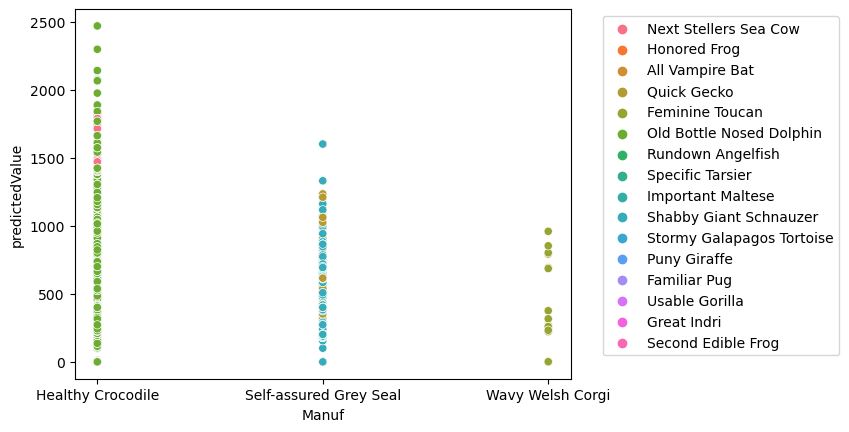

In [259]:
sns.scatterplot(x='Manuf', y='predictedValue', hue='Model', data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [234]:
group_Manu_Model_median = df.groupby(['Manuf', 'Model'])['predictedValue'].median().reset_index()
group_Manu_Model_median

,Manuf,Model,predictedValue
0,Healthy Crocodile,Familiar Pug,0.000000
1,Healthy Crocodile,Important Maltese,100.000000
2,Healthy Crocodile,Next Stellers Sea Cow,0.011059
3,Healthy Crocodile,Old Bottle Nosed Dolphin,0.014000
4,Healthy Crocodile,Second Edible Frog,0.007000
5,Healthy Crocodile,Stormy Galapagos Tortoise,0.020411
6,Healthy Crocodile,Usable Gorilla,0.022000
7,Self-assured Grey Seal,All Vampire Bat,0.006408
8,Self-assured Grey Seal,Great Indri,0.000000
9,Self-assured Grey Seal,Honored Frog,0.016000


In [235]:
# Group predictedValue by manufacturer and model and compute statistics
grouped_data = df.groupby(['Manuf', 'Model'])['predictedValue'].describe()
print(grouped_data)

                                                    count        mean  \
Manuf                  Model                                            
Healthy Crocodile      Familiar Pug                 120.0   58.395815   
                       Important Maltese             13.0  412.844322   
                       Next Stellers Sea Cow       5184.0   78.948025   
                       Old Bottle Nosed Dolphin   24434.0   69.146648   
                       Second Edible Frog           126.0   78.502208   
                       Stormy Galapagos Tortoise     57.0  177.701891   
                       Usable Gorilla               268.0   54.394618   
Self-assured Grey Seal All Vampire Bat               16.0    0.006045   
                       Great Indri                  124.0   34.402767   
                       Honored Frog                 301.0   66.337388   
                       Puny Giraffe                 103.0   82.755777   
                       Quick Gecko                 

In [262]:
# Obtain the predictedvalue of Healthy Crocodile and Self-assured Gray Seal, and perform t-test
hc_pred = df[df['Manuf'] == 'Healthy Crocodile']['predictedValue']
sags_pred = df[df['Manuf'] == 'Self-assured Grey Seal']['predictedValue']

t, p = ttest_ind(hc_pred, sags_pred, equal_var=False)
if p < 0.05:
    print('Reject null hypothesis: True, p_value is:',p)
else:
    print('Reject null hypothesis: False, p_value is:',p)

Reject null hypothesis: False, p_value is: 0.8935489128978716


ii. Between the Planning System Algorithms (Algorithm, column K). Certain Algorithms
will be associated with TPS (Treatment Planning System) since they are developed
by the same vendor. Some facilities use a mix of the vendors for their treatment
machines and their Planning though.

In [238]:
# Combines the TPS and Algorithm columns and calculate the mean predicted value
TPS_Algorithm = df[['Manuf', 'TPS', 'Algorithm', 'predictedValue']]
TPS_Algorithm['TPS_Algorithm'] = df['TPS'] + ' - ' + df['Algorithm']
grouped_df = TPS_Algorithm.groupby('TPS_Algorithm').mean()
print(grouped_df)

                                                    predictedValue
TPS_Algorithm                                                     
Accurate Horn Shark - Accurate Horn Shark                71.252544
Accurate Horn Shark - Unhappy Aardvark                   71.576925
Accurate Horn Shark - Upbeat Macaw                       65.847841
Blue Sea Lion - Genuine English Shepherd                 55.369997
Blue Sea Lion - Stable Bobcat                            70.786740
Grumpy Tapir - Fatal Hamster                             48.595508
Grumpy Tapir - Grumpy Tapir                              -0.002276
Internal Galapagos Penguin - Genuine English Sh...       82.947873
Internal Galapagos Penguin - Wooden Stellers Se...       94.902425
Untimely Nurse Shark - Genuine English Shepherd          67.277866
Untimely Nurse Shark - Stable Bobcat                     78.522277
Untimely Nurse Shark - Wooden Stellers Sea Cow           96.365611


D:\temp\ipykernel_28244\1025168711.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TPS_Algorithm['TPS_Algorithm'] = df['TPS'] + ' - ' + df['Algorithm']
D:\temp\ipykernel_28244\1025168711.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = TPS_Algorithm.groupby('TPS_Algorithm').mean()


In [239]:
# Split the data into groups based on TPS and algorithm and perform t-tests
group1 = TPS_Algorithm[TPS_Algorithm['TPS_Algorithm'].str.contains('Accurate Horn Shark')]
group2 = TPS_Algorithm[TPS_Algorithm['TPS_Algorithm'].str.contains('Blue Sea Lion')]
group3 = TPS_Algorithm[TPS_Algorithm['TPS_Algorithm'].str.contains('Grumpy Tapir')]
group4 = TPS_Algorithm[TPS_Algorithm['TPS_Algorithm'].str.contains('Internal Galapagos Penguin')]
group5 = TPS_Algorithm[TPS_Algorithm['TPS_Algorithm'].str.contains('Untimely Nurse Shark')]
groups = [group1, group2, group3, group4, group5]

for i in range(len(groups)):
    for j in range(i+1, len(groups)):
        t, p = ttest_ind(groups[i]['predictedValue'], groups[j]['predictedValue'], equal_var=False)
        print(f"t-test between {groups[i]['TPS_Algorithm'].iloc[0]} and {groups[j]['TPS_Algorithm'].iloc[0]}:")
        print(f"t-value: {t}, p-value: {p}\n")

t-test between Accurate Horn Shark - Unhappy Aardvark and Blue Sea Lion - Genuine English Shepherd:
t-value: 0.21809879289538803, p-value: 0.8273558265256609

t-test between Accurate Horn Shark - Unhappy Aardvark and Grumpy Tapir - Grumpy Tapir:
t-value: 2.82353865233031, p-value: 0.005021076648101117

t-test between Accurate Horn Shark - Unhappy Aardvark and Internal Galapagos Penguin - Wooden Stellers Sea Cow:
t-value: -5.024812557293911, p-value: 5.154975924203952e-07

t-test between Accurate Horn Shark - Unhappy Aardvark and Untimely Nurse Shark - Genuine English Shepherd:
t-value: -0.901425394599867, p-value: 0.3674779387507594

t-test between Blue Sea Lion - Genuine English Shepherd and Grumpy Tapir - Grumpy Tapir:
t-value: 2.704693251043071, p-value: 0.007144077569115847

t-test between Blue Sea Lion - Genuine English Shepherd and Internal Galapagos Penguin - Wooden Stellers Sea Cow:
t-value: -4.527422676521427, p-value: 6.035940905842682e-06

t-test between Blue Sea Lion - Genu

A p-value >0.05, means that we cannot reject the null hypothesis that there is no difference between the means of the two groups at the 95% confidence level.

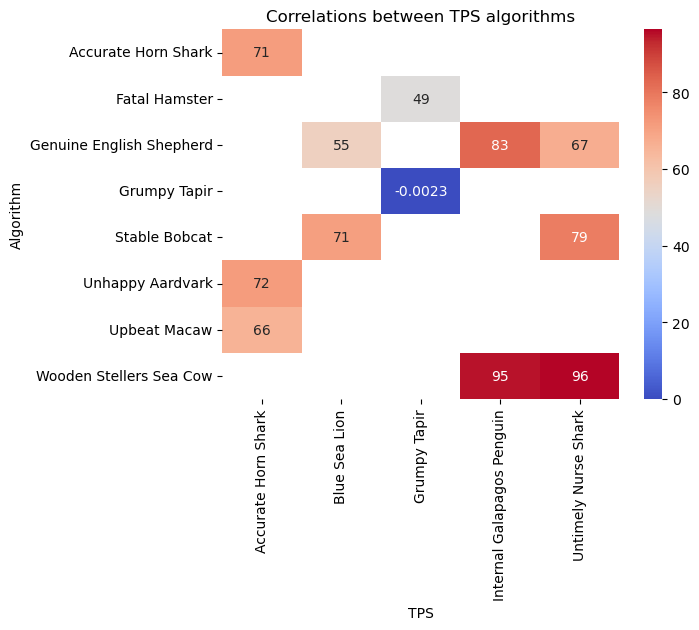

In [240]:
# heatmap visualization
heatmap_data = TPS_Algorithm.pivot_table(index='Algorithm', columns='TPS', values='predictedValue', aggfunc='mean')
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')

plt.title('Correlations between TPS algorithms')
plt.xlabel('TPS')
plt.ylabel('Algorithm')
plt.show()


In [241]:
grouped = df.groupby(['Manuf', 'Model', 'TPS', 'Algorithm'])['predictedValue'].mean()
grouped_size = df.groupby(['Manuf', 'Model', 'TPS', 'Algorithm']).size()
grouped_pct = grouped_size / len(df) *100
result = pd.concat([grouped, grouped_size, grouped_pct], axis=1)
result.columns = ['mean', 'count', 'percent']
result

mean  \
Manuf                  Model                     TPS                        Algorithm                              
Healthy Crocodile      Familiar Pug              Accurate Horn Shark        Unhappy Aardvark           58.395815   
                       Important Maltese         Internal Galapagos Penguin Genuine English Shepherd  412.844322   
                       Next Stellers Sea Cow     Accurate Horn Shark        Accurate Horn Shark        74.856580   
                                                                            Unhappy Aardvark           84.444612   
                                                                            Upbeat Macaw              162.643070   
                                                 Blue Sea Lion              Genuine English Shepherd   54.528986   
                                                                            Stable Bobcat              74.400250   
                                                 Grumpy Tapir               Fatal Hamster              -0.008876   
                                                 Internal Galapagos Penguin Genuine English Shepherd   86.745477   
                                                                            Wooden Stellers Sea Cow    66.901906   
                                                 Untimely Nurse Shark       Genuine English Shepherd   89.654688   
                                                                            Stable Bobcat              78.522277   
                       Old Bottle Nosed Dolphin  Accurate Horn Shark        Accurate Horn Shark        69.441128   
                                                                            Unhappy Aardvark           68.949712   
                                                                            Upbeat Macaw               65.867755   
                                                 Internal Galapagos Penguin Genuine English Shepherd   87.461218   
                                                                            Wooden Stellers Sea Cow    84.317408   
                                                 Untimely Nurse Shark       Wooden Stellers Sea Cow    96.365611   
                       Second Edible Frog        Accurate Horn Shark        Accurate Horn Shark        78.502208   
                       Stormy Galapagos Tortoise Internal Galapagos Penguin Wooden Stellers Sea Cow   177.701891   
                       Usable Gorilla            Accurate Horn Shark        Accurate Horn Shark        53.850093   
                                                                            Unhappy Aardvark           54.739926   
Self-assured Grey Seal All Vampire Bat           Accurate Horn Shark        Unhappy Aardvark            0.006045   
                       Great Indri               Blue Sea Lion              Stable Bobcat              34.402767   
                       Honored Frog              Grumpy Tapir               Grumpy Tapir               -0.002276   
                                                 Internal Galapagos Penguin Genuine English Shepherd   74.229095   
                       Puny Giraffe              Internal Galapagos Penguin Genuine English Shepherd   82.755777   
                       Quick Gecko               Accurate Horn Shark        Upbeat Macaw               50.687530   
                                                 Blue Sea Lion              Genuine English Shepherd   60.654816   
                                                                            Stable Bobcat              74.870130   
                                                 Grumpy Tapir               Fatal Hamster              -0.008186   
                                                 Internal Galapagos Penguin Genuine English Shepherd   76.371447   
                                                                            Wooden Stellers Sea Cow   168.903169   
                                                

In [242]:
grouped_over_5percent = grouped_pct[grouped_pct > 5]
result = grouped.loc[grouped_over_5percent.index]
result 

Manuf                   Model                     TPS                  Algorithm          
Healthy Crocodile       Old Bottle Nosed Dolphin  Accurate Horn Shark  Accurate Horn Shark    69.441128
                                                                       Unhappy Aardvark       68.949712
                                                                       Upbeat Macaw           65.867755
Self-assured Grey Seal  Shabby Giant Schnauzer    Blue Sea Lion        Stable Bobcat          70.570933
Name: predictedValue, dtype: float64

iii. For the appropriate Cases, compare IMRT with VMAT results (IMRT and VMAT are
two different treatment delivery techniques…they are supposed to be the same, but
it would be interesting to see if they show differences in results?)

In [243]:
imrt_data = df[df['Point type'].str.contains('IMRT')]
vmat_data = df[df['Point type'].str.contains('VMAT')]

imrt_means = imrt_data.groupby(imrt_data['Point type'])['predictedValue'].mean()
vmat_means = vmat_data.groupby(vmat_data['Point type'])['predictedValue'].mean()

print(imrt_means)
print(vmat_means)

Point type
IMRT: Average local difference in exclusion     -0.056274
IMRT: Average local difference in volume         0.015085
IMRT: Gamma 2%/2mm (10% threshold)               0.910630
IMRT: Gamma 3%/2mm (10% threshold)               0.954945
IMRT: Gamma 3%/3mm (10% threshold)               0.973770
IMRT: Gamma 3%/3mm (20% threshold)               0.964629
IMRT: Gamma 7%/4mm (10% threshold)               0.999860
IMRT: worst point +ve                            0.040931
IMRT: worst point -ve                           -0.003004
Monitor Units (IMRT)                           650.325933
Name: predictedValue, dtype: float64
Point type
Monitor Units (VMAT)                           624.561253
VMAT: Average local difference in exclusion     -0.052471
VMAT: Average local difference in volume         0.009618
VMAT: Gamma 2%/2mm (10% threshold)               0.915939
VMAT: Gamma 3%/2mm (10% threshold)               0.958897
VMAT: Gamma 3%/3mm (10% threshold)               0.980016
VMAT: Gamma 3

In [244]:
#perform the t-test
imrt_data = [-0.056274,0.015085, 0.910630,0.954945, 0.973770, 0.964629, 0.999860, 0.040931, -0.003004,650.325933]
vmat_data = [-0.052471,0.009618, 0.915939, 0.958897, 0.980016, 0.974824, 0.999471, 0.043114, -0.012685,624.561253]
t_statistic, p_value = ttest_ind(imrt_data, vmat_data, equal_var=True)
print("t-statistic: ", t_statistic)
print("p-value: ", p_value)

t-statistic:  0.028580496502328617
p-value:  0.9775136664362876


With a p-value >0.05, we cannot reject the null hypothesis that at the 95% confidence level there is no significant difference between the means of the two groups. This means that we do not have sufficient evidence that IMRT and VMAT show a statistically significant difference in their outcomes.

In [2]:
IMRT = df.loc[df['Point type'].str.contains('IMRT'), 'predictedValue'].tolist()
VMAT = df.loc[df['Point type'].str.contains('VMAT'), 'predictedValue'].tolist()

plt.scatter(range(len(IMRT)), IMRT, color='blue', label='IMRT')
plt.scatter(range(len(VMAT)), VMAT, color='red', label='VMAT')
plt.xlabel('Data index')
plt.ylabel('Predicted value')
plt.legend()
plt.show()


NameError: name 'df' is not defined

In [1]:
intersection = list(set(IMRT) & set(VMAT))
corr = np.corrcoef(IMRT[:len(intersection)], VMAT[:len(intersection)])
print(corr)

NameError: name 'IMRT' is not defined

iv. Compare results between energies. Start with 6MV vs 6FFF and 10MV vs 10FFF.
Then compare 6FFF vs 10FFF and 6MV vs 10MV results.

In [247]:
# Compare 6 vs 6FFF
group1 = df.loc[(df['Energy:'] == 6) & (df['Energy_FFF :'] == 0), 'predictedValue']
group2 = df.loc[(df['Energy:'] == 6) & (df['Energy_FFF :'] == 1), 'predictedValue']
tstat, pval = ttest_ind(group1, group2)
print('6 vs 6FFF')
print('t-statistic:', tstat)
print('p-value:', pval)
print('Reject null hypothesis: ', pval < 0.05)

# Compare 10 vs 10FFF
group1 = df.loc[(df['Energy:'] == 10) & (df['Energy_FFF :'] == 0), 'predictedValue']
group2 = df.loc[(df['Energy:'] == 10) & (df['Energy_FFF :'] == 1), 'predictedValue']
tstat, pval = ttest_ind(group1, group2)
print('10 vs 10FFF')
print('t-statistic:', tstat)
print('p-value:', pval)
print('Reject null hypothesis: ', pval < 0.05)

# Compare 6FFF vs 10FFF
group1 = df.loc[df['Energy_FFF :'] == 0, 'predictedValue']
group2 = df.loc[df['Energy_FFF :'] == 1, 'predictedValue']
tstat, pval = ttest_ind(group1, group2)
print('6FFF vs 10FFF:')
print('t-statistic:', tstat)
print('p-value:', pval)
print('Reject null hypothesis: ', pval < 0.05)

# Compare 6 vs 10
group1 = df.loc[df['Energy:'] == 6, 'predictedValue']
group2 = df.loc[df['Energy:'] == 10, 'predictedValue']
tstat, pval = ttest_ind(group1, group2)
print('6 vs 10')
print('t-statistic:', tstat)
print('p-value:', pval)
print('Reject null hypothesis: ', pval < 0.05)


6 vs 6FFF
t-statistic: -1.1849920772542961
p-value: 0.23603230961817673
Reject null hypothesis:  False
10 vs 10FFF
t-statistic: -4.148618982175337
p-value: 3.362917073521272e-05
Reject null hypothesis:  True
6FFF vs 10FFF:
t-statistic: -4.183631250171227
p-value: 2.8748037833220657e-05
Reject null hypothesis:  True
6 vs 10
t-statistic: 1.3434832215765238
p-value: 0.17912330700154308
Reject null hypothesis:  False


From the results of the t-test, we can conclude that there is a statistically significant difference between the predicted values of 10 and 10FFF and between the predicted values of 6FFF and 10FFF, but not between the predicted values of 6 and 10FFF of 6FFF or Between the predicted values of 6 and 10.

The p-values for 6 vs. 6FFF and 6 vs. 10 comparisons are greater than 0.05, indicating that we cannot reject the null hypothesis that there is no difference between the predicted values for these comparisons. 

However, the p-values for the 10 vs 10FFF and 6FFF vs 10FFF comparisons are less than 0.05, suggesting that we can reject the null hypothesis that there is no difference between the predicted values of these comparisons and conclude that there is a significant difference between the compared energies .

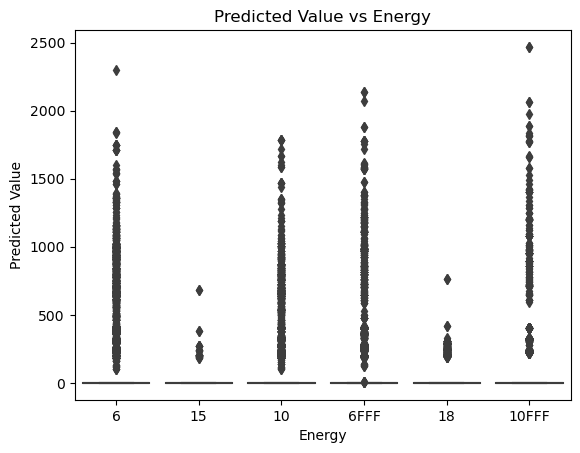

In [248]:
# Create a new column to represent the combined energy and energy form
df['Energy_EF'] = df['Energy:'].astype(str) + np.where(df['Energy_FFF :']==1, 'FFF',"")
sns.boxplot(x='Energy_EF', y='predictedValue', data=df)
plt.title('Predicted Value vs Energy')
plt.xlabel('Energy')
plt.ylabel('Predicted Value')
plt.show()

v. Compare results by Array (Column O). We have had a few different arrays over the
years, and it would be interesting to see if results with one array are better than
another?

In [249]:
# Calculate one-way ANOVA
f_value, p_value = f_oneway(df.loc[df['Array'] == 'Glass Malayan Tiger']['predictedValue'], df.loc[df['Array'] == 'Rapid Whippet']['predictedValue'], df.loc[df['Array'] == 'Gifted Australian Shepherd']['predictedValue'])

print('F-value:', f_value)
print('P-value:', p_value)
if p_value < 0.05:
    print('Reject null hypothesis: True')
else:
    print('Reject null hypothesis: False')


F-value: 21.839088735477016
P-value: 3.315050847670008e-10
Reject null hypothesis: True


The null hypothesis is that there is no difference between the means of predicted values for the three arrays. The p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant difference between the means.